In [6]:
import numpy as np
from operator import *
import operator
import os

In [7]:
def KNN(data,rawdata,label,k):
    '''
    data:未知数据
    rawdata:数据集
    label:标签
    k:选取前k个数据
    '''
    m = rawdata.shape[0]
    differ = (np.tile(data,(m,1))-rawdata)**2
    differ_matrix = np.sum(differ,axis=0)
    distance = differ_matrix**0.2
    
    ##返回获得距离的索引
    sortlabelindex = distance.argsort()
    
    distance_label = {}
    
    for i in range(k):
        index = label[sortlabelindex[i]]
        distance_label[index] = distance_label.get(index,0)+1
        
    sorted_distance_label = sorted(distance_label.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_distance_label[0][0]
    
    

In [8]:
def get_data(file):
    f = open(file)
    lines = f.readlines()
    cols = len(lines)
    data_matirx = np.zeros((cols,3))
    label_matrix = []
    index = 0
    for line in lines:
        line = line.strip().split('\t')
        data_matirx[index,:]=line[0:3]
        label_matrix.append(line[3])
        index=index+1
    return data_matirx,label_matrix

def label(label):
    new_label = list(set(label))
    new_label.sort(key=label.index)
    items = list(range(0,3))
    label_dict={}
    index=0
    for i in new_label:        
        label_dict[i]=index
        index=index+1
    label_new = [label_dict[x] for x in label]
    return label_new
    
    
data_matirx,label_matrix=get_data('./data/datingTestSet.txt')
label_matrix[0:20]
classfy = list(set(label_matrix))
classfy.sort(key=label_matrix.index)
label=label(label_matrix)

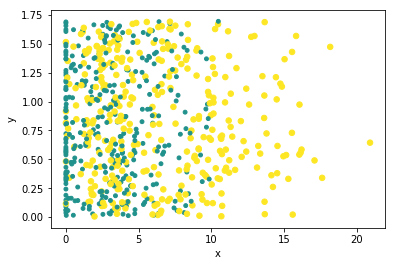

In [9]:
import matplotlib.pyplot as plt
import matplotlib
def draw_scatter(data,label):
    fig = plt.figure()
    #ax = fig.add_subplot(111)
    plt.scatter(data[:,1],data[:,2],15.0*np.array(label),15.0*np.array(label))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
draw_scatter(data_matirx,label)

In [10]:
def norm(data):
    min_data = data.min(axis=0)
    max_data = data.max(axis=0)
    delta = np.tile(max_data-min_data,(data.shape[0],1))
    #print(np.tile(min_data,(1000,1)))
    #print(max_data)
    min_data_tile = np.tile(min_data,(data.shape[0],1))
    #min_data_tile = np.tile(min_data,(3,1))
    return((data-min_data_tile)/delta)
norm(data_matirx)

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [12]:
from sklearn.utils import shuffle
def test():
    test_ratio =0.2
    data,label=get_data('./data/datingTestSet2.txt')
    data=norm(data)
    m = data.shape[0]
    test_data_len =int(test_ratio*m)
    index =0
    for i in range(test_data_len):
        
        predict = KNN(data[i,:],data[test_data_len:m,:],label[test_data_len:m],3)
        print('predict label is {} true label is {}'.format(predict,label[i]))
        if predict!=label[i]:
            index=index+1
    print("error rate:",index/test_data_len)   
        
    
    
    
test()

predict label is 2 true label is 3
predict label is 2 true label is 2
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 3
predict label is 2 true label is 3
predict label is 2 true label is 1
predict label is 2 true label is 3
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 2
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 1
predict label is 2 true label is 2
predict label is 2 true label is 3
predict label is 2 true label is 2
predict label is 2 true label is 1
predict label is 2 true label is 2
predict label is 2 true label is 3
predict label is 2 true label is 2
predict label is 2 true label is 3
predict label is 2 true label is 2
predict label is 2 true label is 3
predict label is 2 t